[Jonathan Manzano's Assignment 05 git commit history](https://github.com/xjvcm/sjsu-2024-spring-cs-133-02/commits/main/hands_on/05_intro_seaborn/05_hands_on_jonathan_manzano.ipynb)

![](https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg)

In this hands-on, we are going to use a fun dataset to plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

In [19]:
import pandas as pd
import seaborn as sns

%matplotlib inline

pokemon_csv_url = (
    "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"
)
pokemon = pd.read_csv(pokemon_csv_url)
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Here are the descriptions of this dataset:
- `#` - Pokédex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

In [20]:
pokemon = pokemon.rename(
    columns={
        "#": "#",
        "Name": "name",
        "Type 1": "type_1",
        "Type 2": "type_2",
        "Total": "total",
        "HP": "hp",
        "Attack": "attack",
        "Defense": "defense",
        "Sp. Atk": "sp_atk",
        "Sp. Def": "sp_def",
        "Speed": "speed",
        "Generation": "generation",
        "Legendary": "legendary",
    }
)

pokemon.head()

,#,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False



## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `relplot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell immediately following the plot to describe the relationship between Attack and Defense in this dataset.

In [21]:
pokemon = pokemon.dropna()

pokemon.shape

(414, 13)

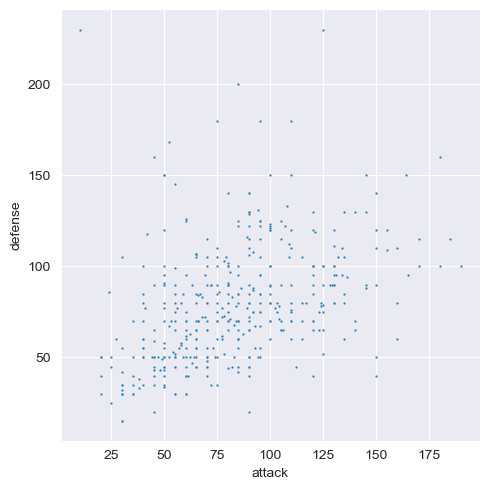

In [22]:
sns.relplot(data=pokemon, x="attack", y="defense", s=3)

From the plot, I observed that there might be a positive correlation between attack and defense. As attack increases, defense increases. There is a dense concentration of points on the plot in between 50 and 75 attacks.

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

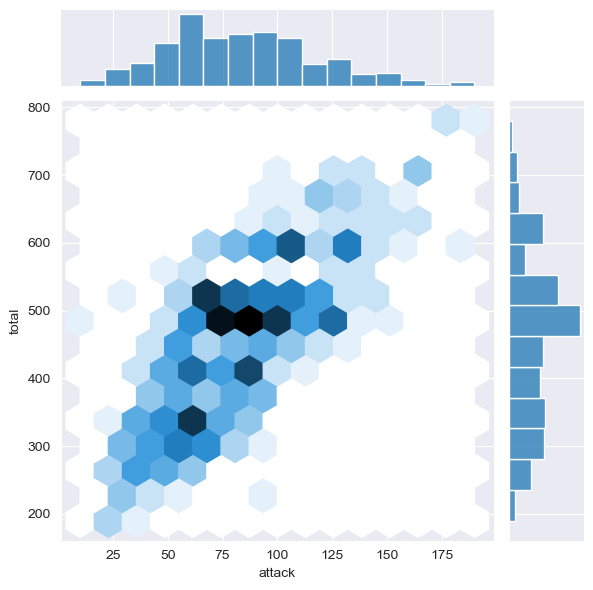

In [23]:
# https://seaborn.pydata.org/generated/seaborn.jointplot.html
sns.jointplot(data=pokemon, x="attack", y="total", kind="hex")

From the plot, I observed that there is a positive correlation with this plot as well. As the attack increases, the total stats increase as well. Outside the plot, there are histograms. The top histogram is max around 60 attack and the total max around 500.

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` . 
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

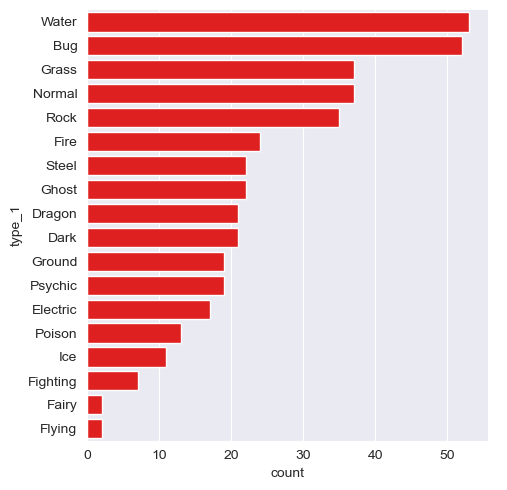

In [24]:
type1_grouped = pokemon["type_1"].value_counts().index
sns.catplot(y="type_1", data=pokemon, kind="count", order=type1_grouped, color="red")

### Ans:

The most common `Type 1` types are water, bug, grass, normal, and rock. The least common `Type 1` types are fighting, fairy, and flying.

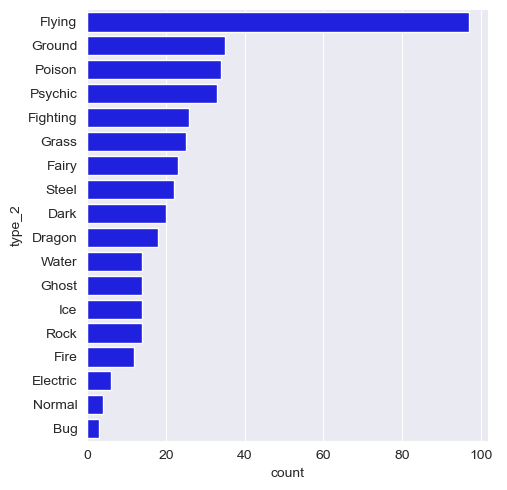

In [25]:
type2_grouped = pokemon["type_2"].value_counts().index
sns.catplot(y="type_2", data=pokemon, kind="count", order=type2_grouped, color="blue")

### Ans:

The most common `Type 2` is flying. The least common `Type 2` is everything else. Based on the plot, other than the fly type, all the counts for the other types are below 40. I am inferring that Pokemon `Type 2` type is not common.